In [2]:
#Ολές οι βιβλιοθήκες που χρησιμοποιήσαμε στον παρακάτω κώδικα
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
print(tf.__version__) #ελέγχω για να δώ εάν έχω την σωστή έκδοση του tensorflow για να φορτώσω το αρχείο mnist

2.7.0


In [3]:
#Φορτώνουμε το αρχείο MNIST απο τα dataset του keras tensorflow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

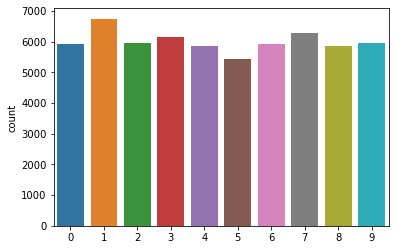

In [4]:
#Μετράμε το συνολικό ανα αριθμό και τα οπτικοποιούμε μέσω seaborn
sb.countplot(train_labels)
plt.show()

In [7]:
#Μειώνω την διάσταση των numpyarray απο 3 σε 2, ουσιαστικά πολλαπλασιάζω τα pixel 28*28=784
nsamples, nx, ny = train_images.shape
train_images = train_images.reshape((nsamples,nx*ny))
train_images.shape

(60000, 784)

In [8]:
#Μειώνω την διάσταση των numpyarray απο 3 σε 2, ουσιαστικά πολλαπλασιάζω τα pixel 28*28=784
msamples, mx, my = test_images.shape
test_images = test_images.reshape((msamples,mx*my))
test_images.shape

(10000, 784)

In [52]:
#Θα χρησιμοποιήσω Support Vector Classifier για να δώ πώς προσαρμόζονται τα δεδομένα σε γραμμικά μοντέλα
svm = LinearSVC(dual=False)
svm.fit(train_images, train_labels)

LinearSVC(dual=False)

In [27]:
svm.coef_ #Τα βάρη που έχουν καταχωρηθεί στο χαρακτηριστικά με γραμμικο kernel
svm.intercept_ #Σταθερές της συνάρτησης απόφασης

array([-0.83163938, -0.01150925, -0.71216086, -1.1216684 , -0.24055063,
        0.0282728 , -0.87392103, -0.13613456, -2.06977148, -1.27828785])

In [110]:
# Η ακρίβεια των δεδομένων στο γραμμικό μοντέλο
accuracy_score(test_labels, labels_pred)

0.9783

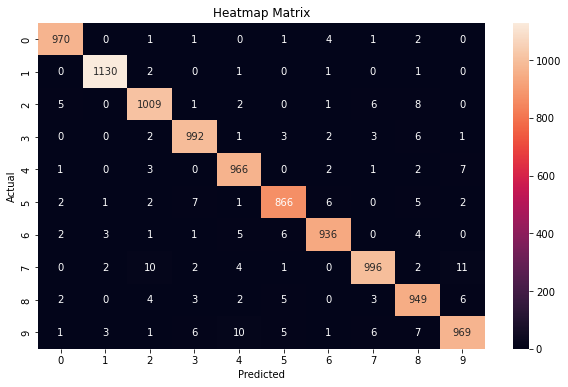

In [54]:
# Χρησιμοποιώ heatmap για να δώ ποιοί συνδιασμοί δεδομένων έχουν περισσότερα misclassifications  
cm = confusion_matrix(test_labels, labels_pred)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap Matrix")
plt.show()

In [9]:
#Linear SVC για πολλαπλούς παράγοντες κόστους C
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(train_images, train_labels)
    coef = svm.coef_
    
    p_tr = svm.predict(train_images)
    a_tr = accuracy_score(train_labels, p_tr)
    
    pred = svm.predict(test_images)
    a = accuracy_score(test_labels, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

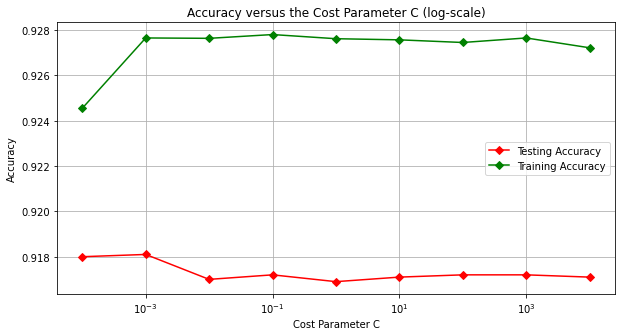

In [10]:
#Σχεδιάγραμμα κόστους και ακρίβειας του μοντέλου
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

plt.subplots(figsize=(10, 5))
plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
plt.grid(True)
plt.xlabel("Cost Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Cost Parameter C (log-scale)')
plt.show()

In [45]:
#Eπιλέγω το μοντέλο με την μεγαλύτερη ακρίβεια στα testing data
svm_coef = coefficient[0]
svm_coef.shape

(9, 8723)

In [13]:
#Support Vector Classification με RBF kernel
#SVC για διάφορους παραγόντες κόστους C και Gamma
coefficient = []
n_supp = []
sup_vec = []
i = 0
df1 = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for g in [0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel='rbf', C=c, gamma=g)
        model = svm.fit(test_images, test_labels)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_
    
        p_tr = svm.predict(test_images)
        a_tr = accuracy_score(test_labels, p_tr)
    
        pred = svm.predict(test_images)
        a = accuracy_score(test_labels, pred)
    
        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,g,a_tr,a]
        i=i+1

In [14]:
#Dataframe με τις τιμές ακρίβειας στο train data και test data
df1

,c,gamma,train_acc,test_acc
0,0.01,0.01,0.1135,0.1135
1,0.01,0.10,0.1135,0.1135
2,0.01,1.00,0.1135,0.1135
3,0.01,10.00,0.1135,0.1135
4,0.01,100.00,0.1135,0.1135
5,0.10,0.01,0.1135,0.1135
6,0.10,0.10,0.1135,0.1135
7,0.10,1.00,0.1135,0.1135
8,0.10,10.00,0.1135,0.1135
9,0.10,100.00,0.1135,0.1135


In [15]:
pd.DataFrame(coefficient[15]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.073242,1.073242,1.073242,1.073242,1.073242,1.073242,1.073242,1.073242,1.073242,1.073242,...,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352,-0.985352
1,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,1.025391,...,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570,-1.059570
2,1.014648,1.014648,1.014648,1.014648,1.014648,1.014648,1.014648,1.014648,1.014648,1.014648,...,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742,-1.010742
3,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,...,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977,-1.000977
4,0.952148,0.952148,0.952148,0.952148,0.952148,0.952148,0.952148,0.952148,0.952148,0.952148,...,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305,-0.987305
5,0.988281,0.988281,0.988281,0.988281,0.988281,0.988281,0.988281,0.988281,0.988281,0.988281,...,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477,-0.938477
6,1.023438,1.023438,1.023438,1.023438,1.023438,1.023438,1.023438,1.023438,1.023438,1.023438,...,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633,-0.973633
7,0.996094,0.996094,0.996094,0.996094,0.996094,0.996094,0.997070,0.997070,0.997070,0.997070,...,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789,-1.008789
8,1.013672,1.013672,1.013672,1.013672,1.013672,1.013672,1.013672,1.013672,1.013672,1.013672,...,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445,-0.981445


In [30]:
pd.DataFrame(n_supp[15]) # n_support_

,0
0,163
1,116
2,276
3,285
4,278
5,339
6,210
7,264
8,299
9,333


In [21]:
#Support Vector Classification με πολυωνυμικό kernel
coefficient = []
n_supp = []
sup_vec = []
i = 0
df2 = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for d in [2,3,4,5,6]:
        svm = SVC(kernel='poly', C=c, degree=d)
        model = svm.fit(test_images, test_labels)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_
    
        p_tr = svm.predict(test_images)
        a_tr = accuracy_score(test_labels, p_tr)
    
        pred = svm.predict(test_images)
        a = accuracy_score(test_labels, pred)
    
        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,d,a_tr,a]
        i=i+1

In [22]:
df2

,c,degree,train_acc,test_acc
0,0.01,2.0,0.8233,0.8233
1,0.01,3.0,0.7322,0.7322
2,0.01,4.0,0.6256,0.6256
3,0.01,5.0,0.5484,0.5484
4,0.01,6.0,0.5001,0.5001
5,0.10,2.0,0.9413,0.9413
6,0.10,3.0,0.9280,0.9280
7,0.10,4.0,0.8917,0.8917
8,0.10,5.0,0.8426,0.8426
9,0.10,6.0,0.7876,0.7876


In [23]:
pd.DataFrame(coefficient[20]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542
0,0.000000,0.000000,0.980263,0.299690,0.000000,4.378266,0.736816,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.433180,-0.187240,-0.950196,-0.000000,-0.000000
1,0.000000,0.372504,1.239989,0.653665,0.000000,4.037691,0.108974,0.492643,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-2.635968,-0.000000,-0.486748,-0.000000,-0.000000
2,0.212657,0.000000,2.010291,0.759050,0.000000,3.999091,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.014624,-1.262646,-1.532568,-0.000000,-0.000000
3,0.000000,0.000000,1.371398,0.154733,0.000000,4.172616,1.521437,0.852878,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-2.380300,-0.000000,-1.676412,-0.000000,-0.000000
4,0.171984,0.000000,3.999353,0.866448,0.000000,6.229062,0.000000,0.000000,0.000000,0.495321,...,-0.000000,-0.000000,-8.813729,-0.442245,-5.995978,-6.081054,-1.989380,-1.049522,-0.023244,-0.445404
5,0.000000,0.000000,2.816039,0.954364,0.286059,2.972950,1.821670,0.000000,0.000000,0.304127,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-6.655494,-0.560791,-0.702318,-0.000000,-0.000000
6,0.000000,0.000000,1.186670,0.627851,0.000000,4.808971,0.522419,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.840973,-0.872607,-0.963639,-0.215027,-0.000000
7,0.149486,0.000000,1.707049,0.469003,0.000000,5.154865,0.000000,0.000000,0.000000,0.149127,...,-0.272298,-1.028946,-0.000000,-0.000000,-0.000000,-6.024296,-0.000000,-1.547490,-0.000000,-0.000000
8,0.183939,0.000000,2.061307,0.815713,0.000000,4.433715,1.353603,0.000000,1.708219,0.503177,...,-0.000000,-1.108923,-0.000000,-0.000000,-0.000000,-0.000000,-1.253348,-0.885250,-0.000000,-0.000000


In [24]:
pd.DataFrame(n_supp[20]) # n_support_

,0
0,163
1,115
2,272
3,283
4,279
5,334
6,213
7,261
8,299
9,324


In [48]:
#Χρησιμοποιούμε Standardscaler για τις μεταβλητές και έχουμε επιλέξει το πολυωνυμικό για λόγους ακρίβειας
step = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(step) # define Pipeline object

In [49]:
#Χρησιμοποιούμε το GridSearchCV για να αποφασίσουμε τις τιμές των gamma και C
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [51]:
#Δοκιμάζουμε το μοντέλο και προσθέτουμε τις παραμέτρους που βρήκαμε
grid.fit(train_images, train_labels)
print ("score = %3.2f" %(grid.score(test_images, test_labels)))
print ("best parameters from train data: ", grid.best_params_)

score = 0.98
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [53]:
#H προβλέψεις των ετικετών στο test
labels_pred = grid.predict(test_images)

In [19]:
#Οι προβλεπόμενες 5
print (labels_pred[100:105])

[6 0 5 4 9]


In [20]:
#Οι τιμές των ίδιων θέσεων στο αρχείο test
print (test_labels[100:105])

[6 0 5 4 9]


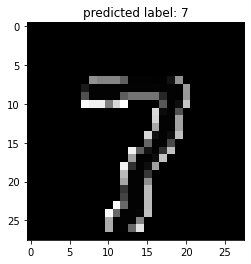

it is an odd number


In [83]:
#Eδώ τεστάρουμε τις παραμέτρους και παρουσιάζουμε εάν είναι μονά ή ζυγά τα στοιχεία που βρήκαμε
for i in (np.random.randint(0,10000,1)):
 two_d = (np.reshape(test_images[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(labels_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()
 if labels_pred[i] == [1]:
    print('it is an odd number')
 elif labels_pred[i] == [3]:
    print('it is an odd number')
 elif labels_pred[i] == [5]:
    print('it is an odd number')
 elif labels_pred[i] == [7]:
    print('it is an odd number')
 elif labels_pred[i] == [9]:
    print('it is an odd number')
 else:
    print('it is an even number')